# Data Analytics ECS784P
## London House Price Data Analysis and Prediction
### Machine Learning of London house price data based on features in yearly data ranging 1995-2018:
- House Price
- House Sales Volume
- House Price Index
- Bank Rate (England)
- GDP (UK)
- GDP Growth (UK)
- Total number household
- Affordability (House price to residence-based earnings ratio)
- Median Income

We are using LinearRegression and GradientBoostingRegressionTree as our methods witht the implementation of ShuffleSPlit cross-validation along with GridSearchCV for parameters tuning.

### Load the data

JS code to prevent sub/scrollable window inside the notebook

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Import external libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from sklearn import preprocessing, model_selection, metrics, svm, ensemble
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit, train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from IPython.display import HTML
from scipy import sparse
from pprint import pprint

%matplotlib inline

HTML and JS code to implement toggle to hide or show warning messages that might come up in notebook

In [3]:
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off Warning Message, click <a href="javascript:code_toggle_err()">here</a>.''')

In [4]:
# get the data from csv and set it to variable 'data'
data = pd.read_csv('data_year_preprocessed.csv')
data = data.set_index('year')

In [5]:
# peek the data
data

,price,salesVolume,indexPrice,rate,gdp,gdpGrowth,numberHousehold,affordability,medianincome
year,,,,,,,,,
1995,74721.32688,106850.0,18.548293,6.3750,1336125,0.025,2869079.452,NaN,15247.90251
1996,78166.22435,132953.0,19.403430,5.9375,1410855,0.025,2887000.000,NaN,15709.96016
1997,89943.92010,154343.0,22.327042,7.2500,1553949,0.043,2855900.000,NaN,16114.26061
1998,102110.61160,145942.0,25.347216,6.2500,1641822,0.033,2872500.000,NaN,16114.26061
1999,115686.25990,169076.0,28.717139,5.5000,1668683,0.032,2901200.000,NaN,16114.26061
2000,142006.69330,149269.0,35.250737,6.0000,1651392,0.035,2923900.000,NaN,16600.00000
2001,159225.79230,162744.0,39.525084,4.0000,1626218,0.028,2963800.000,NaN,17600.00000
2002,187395.75390,173993.0,46.517796,4.0000,1775814,0.025,2971400.000,6.90,18500.00000
2003,211100.92160,153784.0,52.402199,3.7500,2045693,0.033,2979500.000,7.44,18800.00000


In [6]:
# brief statistical description of each column
data.describe()

,price,salesVolume,indexPrice,rate,gdp,gdpGrowth,numberHousehold,affordability,medianincome
count,24.000000,23.000000,24.000000,24.000000,2.400000e+01,24.000000,2.400000e+01,16.000000,24.000000
mean,256214.343276,129640.130435,63.600837,3.158854,2.305429e+06,0.021125,3.056495e+06,9.305000,20995.654520
std,126337.486812,32256.222907,31.361126,2.511183,5.698118e+05,0.016276,1.485513e+05,1.902546,4228.612122
min,74721.326880,75231.000000,18.548293,0.250000,1.336125e+06,-0.042000,2.855900e+06,6.900000,15247.902510
25%,154921.017550,100414.000000,38.456497,0.500000,1.664360e+06,0.017750,2.953450e+06,8.055000,17350.000000
50%,254567.467050,132953.000000,63.192027,3.875000,2.491576e+06,0.025000,3.002550e+06,8.635000,20550.000000
75%,310237.467300,158543.500000,77.011153,5.500000,2.714552e+06,0.029500,3.194025e+06,9.907500,24000.000000
max,480240.157900,173993.000000,119.211428,7.250000,3.085300e+06,0.043000,3.305794e+06,13.240000,28716.393320


In [7]:
# checking which of the columns have missing values which indicated by any number > 0
data.isnull().sum()

price              0
salesVolume        1
indexPrice         0
rate               0
gdp                0
gdpGrowth          0
numberHousehold    0
affordability      8
medianincome       0
dtype: int64

## Data Cleaning

- Fill salesVolume missing values based on a randomized values calculated from its mean and standard deviation

The inputed values will be based in the range of (mean - std) to (mean +std)

In [8]:
salesVolume_avg = data['salesVolume'].mean()
salesVolume_std = data['salesVolume'].std()
salesVolume_null_count = data['salesVolume'].isnull().sum()
salesVolume_null_random_list = np.random.randint(salesVolume_avg - salesVolume_std, salesVolume_avg + salesVolume_std, size=salesVolume_null_count)
data['salesVolume'][np.isnan(data['salesVolume'])] = salesVolume_null_random_list
data['salesVolume'] = data['salesVolume'].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


- Fill affordability missing values based on a randomized values calculated from its minimum value and standard deviation

The reason being is that the affordability is keep growing year by year, so we assume that the missing values which in this case is mostly the data before 2002 will be inputed by randomizing values between the range of (min - std) to (min)
For the value of 2018, We used the 2017 value using the fillna function that pandas library provided using the parameter of method='ffill'

In [9]:
data['affordability'].fillna(method='ffill',inplace=True)
affordability_avg = data['affordability'].mean()
affordability_std = data['affordability'].std()
affordability_min = data['affordability'].min()
affordability_null_count = data['affordability'].isnull().sum()
affordability_null_random_list = np.random.randint(affordability_min - affordability_std, affordability_min, size=affordability_null_count)
data['affordability'][np.isnan(data['affordability'])] = affordability_null_random_list
data['affordability'] = data['affordability'].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [10]:
# Double checking which of the columns have missing values which indicated by any number > 0
data.isnull().sum()

price              0
salesVolume        0
indexPrice         0
rate               0
gdp                0
gdpGrowth          0
numberHousehold    0
affordability      0
medianincome       0
dtype: int64

### Data Visualisation
- Plot data to visualize the values of house price, sales volume, gdp, and number household each year.
- Visualize a correlation matrix between each feature to get a better understanding of feature importance

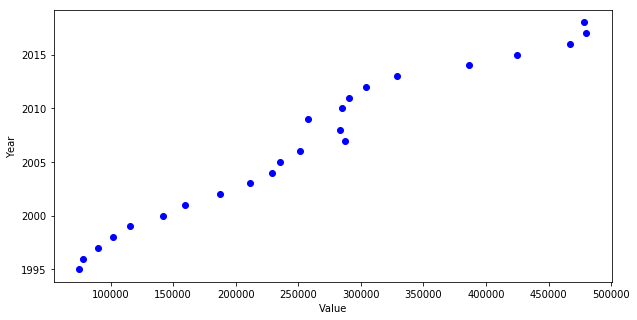

In [11]:
# plot data
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(data.price,data.index, color="b", label="House Price")
ax.set_xlabel("Value")
ax.set_ylabel("Year")
plt.show()

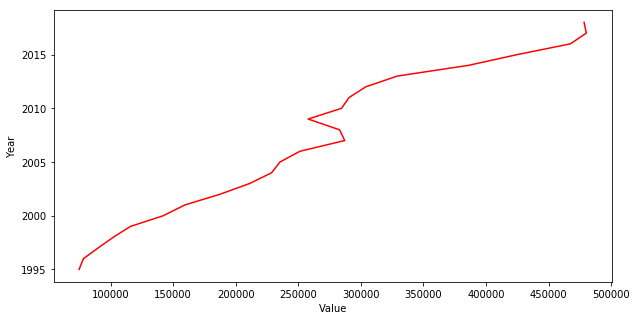

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(data.price,data.index, color="r", label="salesVolume")
ax.set_xlabel("Value")
ax.set_ylabel("Year")
plt.show()

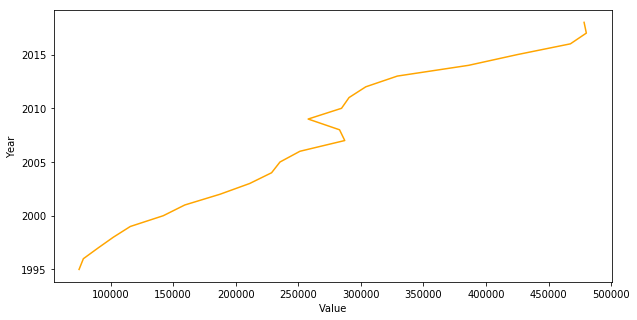

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(data.price,data.index, color="orange", label="GDP")
ax.set_xlabel("Value")
ax.set_ylabel("Year")
plt.show()

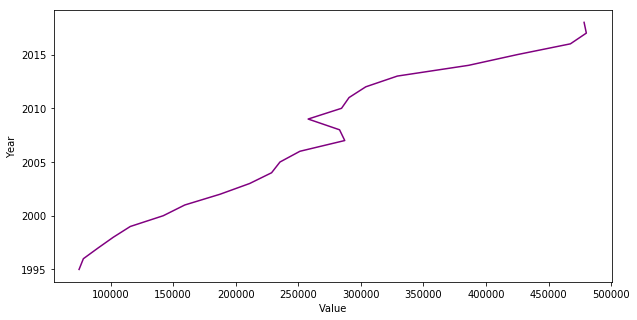

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(data.price,data.index, color="purple", label="numberHousehold")
ax.set_xlabel("Value")
ax.set_ylabel("Year")
plt.show()

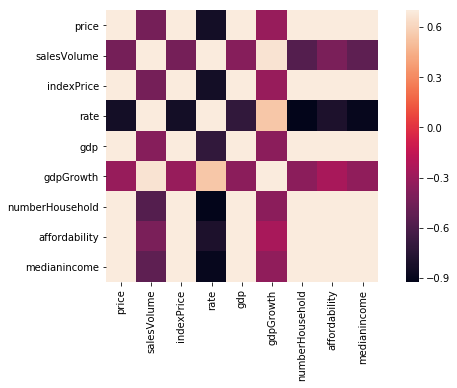

In [15]:
# Build the correlation matrix
matrix = data.corr()
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(matrix, vmax=0.7, square=True)

#### Data Preparation/Allocation
- Preparing Data by separating them into training and target (test) tables

In [16]:
# allocate all columns beside price as the training table 'train1' which will be the train
train1 = data.drop(['price'],axis=1)

In [17]:
# allocate price column as target table which will be the test
target = data['price']

## Methodology
- Gradient Boosted Regression Trees

Gradient Boosted Regression Trees (GBRT) or shorter Gradient Boosting is a flexible non-parametric statistical learning technique for classification and regression.
- Linear Regression

One of the simplest model of supervised learning which assumed that the dependent variable (House Price) varies linearly with the independent variable(s) (House Sales Volume, Income, etc). Essentially fitting a straight line through the data and expecting it to give us a good prediction for values we haven't seen.

The idea of building a model is to minimize this error so that when we make a new prediction we can do so with utmost confidence (~95% is a good benchmark). There are multiple ways of minimizing this error, simplest being the least-squares method. In other words, calculating the sum of squares of each error (to eliminate negatives) and minimizing this number.

#### Linear Regression

In [18]:
reg = LinearRegression()

In [19]:
# split the data 90% as train 10% as test
x_train , x_test , y_train , y_test = train_test_split(train1 , target , test_size = 0.10,random_state =0)

In [20]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
reg.score(x_test,y_test)

0.9999999999999996

As we can see from the result of the LinearRegression score (~99%) which means that its way over-fitting.
In order to resolve this issue, we implemented a second method, GBRT while also using GridSearchCV method to tune the parameters.

#### Gradient Boosting

In [22]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(train1, target, test_size = 0.10,random_state =0)

In [23]:
gbrt=GradientBoostingRegressor(n_estimators=10)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=10, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

A simple table to show the result of feature importances based on gbrt

In [24]:
importances = gbrt.feature_importances_
std = np.std([gbrt.feature_importances_ for tree in gbrt.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# print the list of features and assigning number to each
count = 0
for i in list(X_train.columns.values):
    print("{} is feature {}".format(i,count))
    count +=1
print()
# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

salesVolume is feature 0
indexPrice is feature 1
rate is feature 2
gdp is feature 3
gdpGrowth is feature 4
numberHousehold is feature 5
affordability is feature 6
medianincome is feature 7

Feature ranking:
1. feature 7 (0.487810)
2. feature 1 (0.276482)
3. feature 6 (0.097341)
4. feature 5 (0.075114)
5. feature 3 (0.032181)
6. feature 2 (0.030677)
7. feature 0 (0.000395)
8. feature 4 (0.000000)


In [25]:
print ("R-squared for Train: %.2f" %gbrt.score(X_train, y_train))
print ("R-squared for Test: %.2f" %gbrt.score(X_test, y_test))

R-squared for Train: 0.87
R-squared for Test: 0.79


Default parameters of GBRT with n_estimators=10 already shown a good score of R-squared in both Train and Test, however, we want to see if we can optimize it more using ShuffleSplit cross-validation and GridSearchCV

- function to find the best parameter

In [26]:
def GradientBooster(param_grid, n_jobs):

    estimator = GradientBoostingRegressor()

#Cross-validation using ShuffleSplit which randomly shuffles and selects Train and CV sets for each iteration.
#There are other methods like the KFold split.
    cv = ShuffleSplit(X_train.shape[0], test_size=0.1)
#Using GridSearchCV to evaluate the classifier
    classifier = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs)

#We'll now fit the training dataset to this classifier
    classifier.fit(X_train, y_train)

#print the result
    print ("Best Estimator learned through GridSearch")
    print()
    print (classifier.best_estimator_)
    
    return cv, classifier.best_estimator_

- function to plot the learning result

In [27]:
print(__doc__)


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


In [28]:
param_grid={'n_estimators':[10], 
            'learning_rate': [0.1],# 0.05, 0.02, 0.01],
            'max_depth':[6],#4,6], 
            'min_samples_leaf':[3],#,5,9,17], 
            'max_features':[1.0],#,0.3]#,0.1]
           }
n_jobs=4

# fit GBRT to the digits training dataset by calling the function we just created.
cv,best_est=GradientBooster(param_grid, n_jobs)

Best Estimator learned through GridSearch

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=1.0,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=10, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)


In [29]:
#so we got back the best estimator parameters based on GridSearch as follows:
print ("Best Estimator Parameters")
print ("---------------------------")
print ("n_estimators: %d" %best_est.n_estimators)
print ("max_depth: %d" %best_est.max_depth)
print ("Learning Rate: %.1f" %best_est.learning_rate)
print ("min_samples_leaf: %d" %best_est.min_samples_leaf)
print ("max_features: %.1f" %best_est.max_features)

print ("Train R-squared: %.2f" %best_est.score(X_train,y_train))

#We believe that each of these parameters is critical for the method to learn better.
#We hope that some of them will help address overfitting issues as well.

Best Estimator Parameters
---------------------------
n_estimators: 10
max_depth: 6
Learning Rate: 0.1
min_samples_leaf: 3
max_features: 1.0
Train R-squared: 0.87


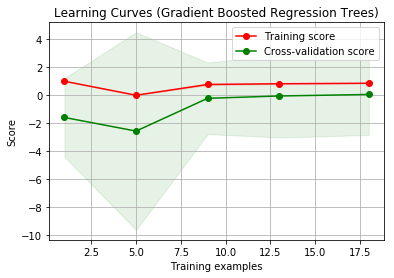

In [30]:
#call the plot_learning_curve module by feeding it the estimator

#The module simply runs the estimator multiple times on subsets of the data provided and plots the train and cv scores.
#We're feeding the best parameters we've learned from GridSearchCV to the estimator now.
#We may need to adjust the hyperparameters further if there is overfitting or underfitting
title = "Learning Curves (Gradient Boosted Regression Trees)" 
estimator = GradientBoostingRegressor(n_estimators=best_est.n_estimators, max_depth=best_est.max_depth,
                                      learning_rate=best_est.learning_rate, min_samples_leaf=best_est.min_samples_leaf,
                                      max_features=best_est.max_features)
plot_learning_curve(estimator, title, X_train, y_train, cv=cv, n_jobs=n_jobs)
plt.show()

In [31]:
#Re-fitting to the train set
estimator.fit(X_train, y_train)

#Calculating train/test scores - R-squared value
print ("Train R-squared: %.2f" %estimator.score(X_train, y_train))
print ("Test R-squared: %.2f" %estimator.score(X_test, y_test))

Train R-squared: 0.87
Test R-squared: 0.72


Looks like we've done an okay job getting about ~0.71 R-squared on the cv set.
However, the default result is still better.
Therefore, from the learning curve, it seems that we may be able to do a bit better with more estimators.

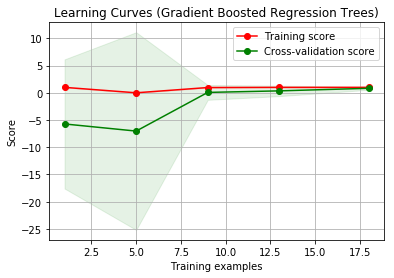

In [32]:
#call the plot_learning_curve module by feeding it the estimator again but this time we bumped up the number estimators
title = "Learning Curves (Gradient Boosted Regression Trees)" 
estimator = GradientBoostingRegressor(n_estimators=100, max_depth=best_est.max_depth,
                                      learning_rate=best_est.learning_rate, min_samples_leaf=best_est.min_samples_leaf,
                                      max_features=best_est.max_features)
plot_learning_curve(estimator, title, X_train, y_train, cv=cv, n_jobs=n_jobs)
plt.show()

In [33]:
#Re-fitting to the train set
estimator.fit(X_train, y_train)

#Calculating train/test scores - R-squared value
print ("Train R-squared: %.2f" %estimator.score(X_train, y_train))
print ("Test R-squared: %.2f" %estimator.score(X_test, y_test))

Train R-squared: 1.00
Test R-squared: 0.97


It did improve the training score but there's way more overfitting.
This possibly could be addressed by further reducing learning rate.
However, we might not see a major improvement unless we can obtain more samples.

In [34]:
#Switching back to the default model
gbrt=GradientBoostingRegressor(n_estimators=10)
gbrt.fit(X_train, y_train)
y_pred=gbrt.predict(X_test)

#Calculating train/test scores - R-squared value
print ("Train R-squared: %.2f" %gbrt.score(X_train, y_train))
print ("Test R-squared: %.2f" %gbrt.score(X_test, y_test))

Train R-squared: 0.87
Test R-squared: 0.79


In [35]:
print("Prediction Result: ")
for i in y_pred:
    print (i)

print()
print("Actual Result: ")
y_test.head()

Prediction Result: 
264021.7048683567
237654.1439182278
392462.62231642473

Actual Result: 


year
2006    251281.1776
2005    235329.2691
2017    480240.1579
Name: price, dtype: float64

### In conclusion, our final R-squared on the London house price dataset is ~0.79